In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# 1. Read data

In [123]:
df = pd.read_csv('../Practice_4/train.csv', index_col='Id')

## 1.1 EDA

In [124]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


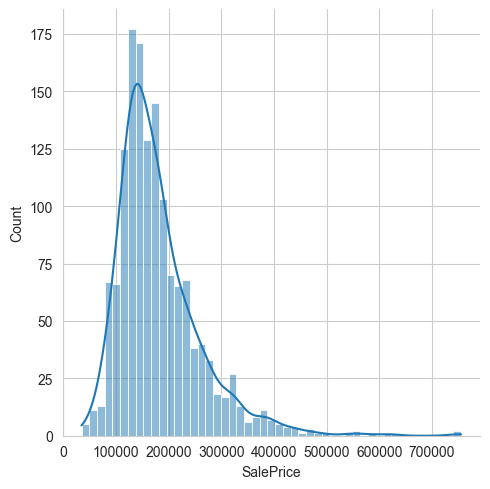

In [6]:
sns.displot(df.SalePrice, kde=True)
plt.show()

## 1st way to get all columns types

In [7]:
int_columns = df.dtypes[df.dtypes == 'int64'].index
float_columns = df.dtypes[df.dtypes == 'float64'].index
object_columns = df.dtypes[df.dtypes == 'O'].index

## 2nd type to get all columns type

In [8]:
float_columns = df.select_dtypes(float).columns
int_columns = df.select_dtypes(int).columns
object_columns = df.select_dtypes('O').columns

print('Float col:', len(int_columns), '\nInt col:', len(float_columns), '\nObject col:', len(object_columns))

Float col: 34 
Int col: 3 
Object col: 43


# 2.1 Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=21, shuffle=True)
df_train.shape, df_test.shape

X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

X_test = df_test.drop('SalePrice', axis=1)
y_test = df_test['SalePrice']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1095, 79) (1095,) (365, 79) (365,)


# 3. Transforming string into numbers

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
display(df[object_columns].head())
display(df[object_columns].nunique())

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

## 3.1 Label encoding

In [13]:
encoder = LabelEncoder() #instance of a class

In [14]:
display(X_train.LotShape.value_counts())
transformed_column = encoder.fit_transform(X_train.LotShape)
pd.Series(transformed_column).value_counts()

LotShape
Reg    692
IR1    360
IR2     35
IR3      8
Name: count, dtype: int64

3    692
0    360
1     35
2      8
Name: count, dtype: int64

In [15]:
display(X_train.Neighborhood.value_counts())
transformed_neighbourhods = encoder.fit_transform(X_train.Neighborhood)
pd.Series(transformed_neighbourhods).value_counts()

Neighborhood
NAmes      164
CollgCr    117
OldTown     85
Edwards     77
Somerst     66
Sawyer      61
NridgHt     56
Gilbert     55
NWAmes      54
SawyerW     42
BrkSide     41
Mitchel     35
Crawfor     33
NoRidge     32
Timber      32
IDOTRR      30
ClearCr     24
SWISU       22
StoneBr     16
Blmngtn     15
Veenker     11
MeadowV     10
BrDale      10
NPkVill      6
Blueste      1
Name: count, dtype: int64

12    164
5     117
17     85
7      77
21     66
19     61
16     56
8      55
14     54
20     42
3      41
11     35
6      33
15     32
23     32
9      30
4      24
18     22
22     16
0      15
24     11
10     10
2      10
13      6
1       1
Name: count, dtype: int64

## 3.2 One hot encoding (categories < 10)

### Try for one columns

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
display(X_train.LotShape.value_counts())
ohe = OneHotEncoder(sparse_output=False) #instance
X_train['LotShape'].to_numpy().reshape(-1, 1)
result = ohe.fit_transform(np.array(X_train['LotShape']).reshape(-1, 1))
pd.DataFrame(result, columns=X_train['LotShape'].unique()).astype(int).head()

LotShape
Reg    692
IR1    360
IR2     35
IR3      8
Name: count, dtype: int64

,Reg,IR1,IR3,IR2
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0


## 3.3 Alternative way to make One Hot Encoding

In [18]:
pd.get_dummies(X_train.LotShape).astype(int).head()

,IR1,IR2,IR3,Reg
Id,,,,
1114,0,0,0,1
1050,0,0,0,1
1182,1,0,0,0
1298,0,0,0,1
1156,1,0,0,0


In [19]:
X_train.Neighborhood.head()

Id
1114      NAmes
1050    Edwards
1182    Crawfor
1298    Edwards
1156    Veenker
Name: Neighborhood, dtype: object

In [20]:
pd.get_dummies(X_train.Neighborhood).astype('int').head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1182,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1298,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3.4 Apply One Hot Encoding to all columns

In [21]:
pd.get_dummies(X_train[object_columns]).astype('int').head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1114,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1050,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1182,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1298,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1156,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# 4. Transforming all our data (Train + Test)
## 4.1 Remove missing values

In [22]:
print('Number of missing values in Train:', X_train.isna().sum().sum())
print('Number of missing values in Test:',X_test.isna().sum().sum())

X_train = X_train.fillna(method='ffill').dropna(axis=1)
X_test = X_test.fillna(method='ffill').dropna(axis=1)

print('Number of missing values in Train:', X_train.isna().sum().sum())
print('Number of missing values in Test:',X_test.isna().sum().sum())

Number of missing values in Train: 5875
Number of missing values in Test: 1954
Number of missing values in Train: 0
Number of missing values in Test: 0


Check than we didnt change number of columns after transformation

In [23]:
X_train.shape, X_test.shape, all(X_train.columns == X_test.columns)

((1095, 73), (365, 73), True)

## 4.2 Label encoding + One Hot encoding

In [24]:
## Instances of a Encoder
object_columns = X_train.select_dtypes('O').columns
number_of_categories = X_train[object_columns].nunique()

label_encoding_cols = number_of_categories[number_of_categories > 10].index
ohe_encoding_cols = number_of_categories[number_of_categories < 10].index

label_encoder = LabelEncoder()
ohe_encoder = OneHotEncoder(sparse_output=False, dtype=int, drop='first', handle_unknown='ignore')

## 4.2.1 Train transforming (fit_transform!)

In [25]:
X_train[label_encoding_cols] = X_train[label_encoding_cols].apply(label_encoder.fit_transform) #3
X_train_ohe = pd.DataFrame(ohe_encoder.fit_transform(X_train[ohe_encoding_cols])).set_index(X_train.index)
X_train = pd.concat((X_train, X_train_ohe), axis=1).drop(ohe_encoding_cols, axis=1)
print(X_train.shape, X_train_ohe.shape)

(1095, 175) (1095, 136)


## 4.2.2 Test transforming (only transform!)

In [26]:
X_test[label_encoding_cols] = X_test[label_encoding_cols].apply(LabelEncoder().fit_transform) #3
X_test_ohe = pd.DataFrame(ohe_encoder.transform(X_test[ohe_encoding_cols])).set_index(X_test.index)
X_test = pd.concat((X_test, X_test_ohe), axis=1).drop(ohe_encoding_cols, axis=1)
print(X_test.shape, X_test_ohe.shape)

(365, 175) (365, 136)


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [12, 17, 22, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Check data shape after transformation

In [27]:
print(X_test.shape, X_train.shape)

(365, 175) (1095, 175)


## 4.3 Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
column_to_scale = X_train.nunique()[X_train.nunique() > 50].index

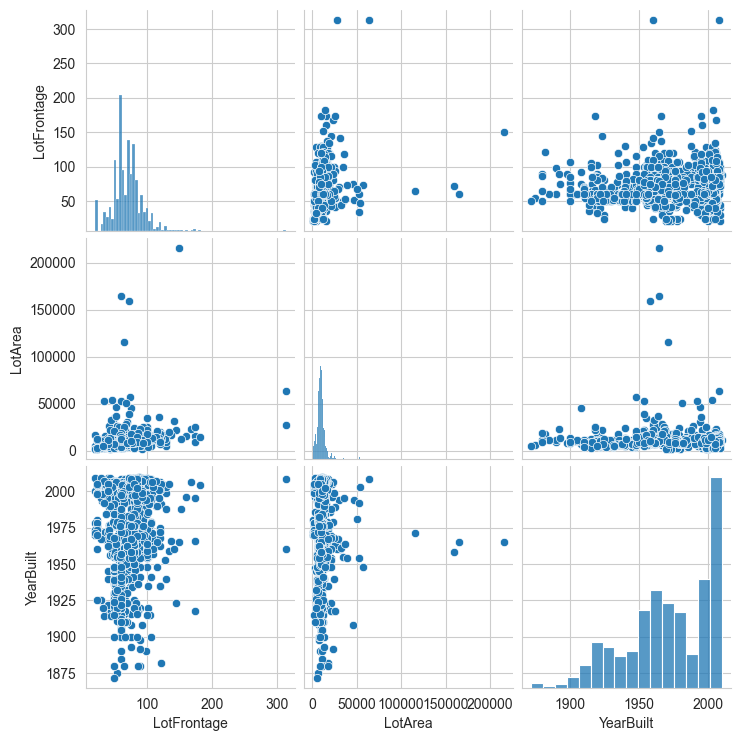

In [30]:
sns.pairplot(X_train[column_to_scale[:3]])
plt.show()

## 4.3.1 Scale Train data

In [31]:
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(X_train[column_to_scale])
X_train[column_to_scale] =  scaled_values
X_train[column_to_scale].describe().astype(int)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
count,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095
mean,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1


## 4.3.2 Scale test data

In [32]:
scaled_values_test = scaler.transform(X_test[column_to_scale])
X_test[column_to_scale] =  scaled_values_test
X_test[column_to_scale].describe().astype(int)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
count,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
mean,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


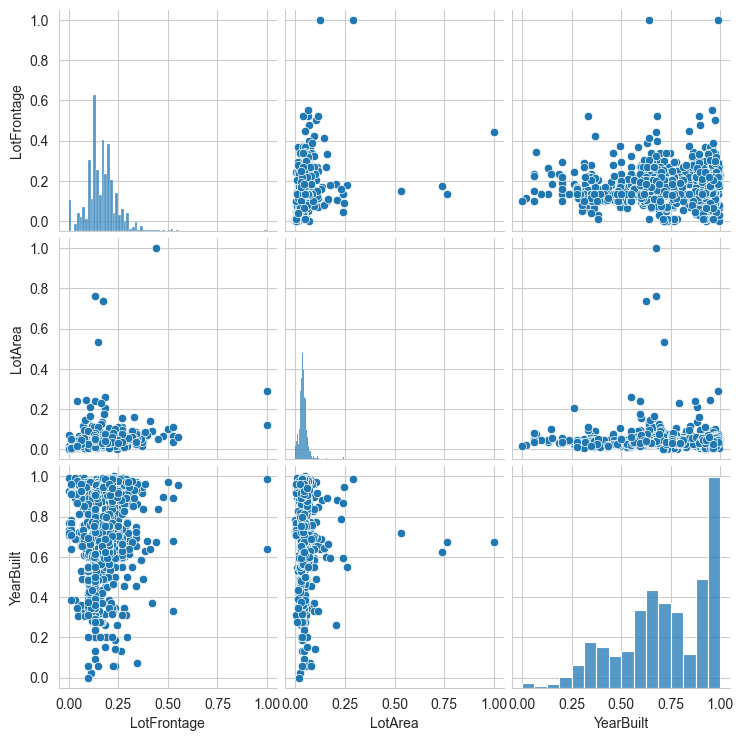

In [33]:
sns.pairplot(X_train[column_to_scale[:3]])
plt.show()

In [34]:
X_train.columns = X_train.columns.astype(str)

X_test.columns = X_test.columns.astype(str)

# 5. Training a model

## 5.0 Create universal func for validation

In [92]:
from sklearn.metrics import r2_score as r2, mean_absolute_percentage_error as mape, mean_squared_error as mse

def evaluate_model(y_test: np.array, y_pred: np.array)-> None:
    pred_df = pd.DataFrame({'y_real' : y_test, 'y_pred' : y_pred})
    pred_df['Abs. Error'] = pred_df['y_real'] - pred_df['y_pred']
    pred_df['Percentage error'] = np.round((pred_df['y_real'] - pred_df['y_pred']) / pred_df['y_real'] * 100, 2)
    mean_error = pred_df['Percentage error'].mean()
    abs_mean_error = pred_df['Abs. Error'].mean()
    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, dpi=150, figsize=(12, 4))

    ax1.scatter(y_test, y_pred, s=3)
    ax1.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], ls="--", color='r', label='Ideal case')
    ax1.set_xlabel('Real price, $')
    ax1.set_ylabel('Predicted price, $')
    ax1.set_title('Real with Predicted price')
    ax1.legend()
    
    sns.histplot(pred_df['Percentage error'], ax=ax2)
    ax2.axvline(mean_error, color='r', label='Mean model error')
    ax2.set_title('Pecentage errors distribution')
    
    sns.histplot(pred_df['Abs. Error'], ax=ax3)
    ax3.axvline(abs_mean_error, color='r', label='Mean model error')
    ax3.set_title('Abs. Errors distribution')
    plt.suptitle('Model evaluation', fontweight='bold')
    plt.show()
    
    print(f'R2 = {r2(y_test, y_pred):.2f}')
    print(f'MAPE = {mape(y_test, y_pred):%}')
    print(f'RMSE = {np.sqrt(mse(y_test, y_pred)):.2f} $')

## 5.1 Linear regression

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #instance
lr.fit(X_train, y_train) # 75% of data
y_pred = lr.predict(X_test)

print(f'R2 score: {lr.score(X_test, y_test):.3f}' ) # examine R2 score

R2 score: 0.518


### 5.1.1 Model evaluation

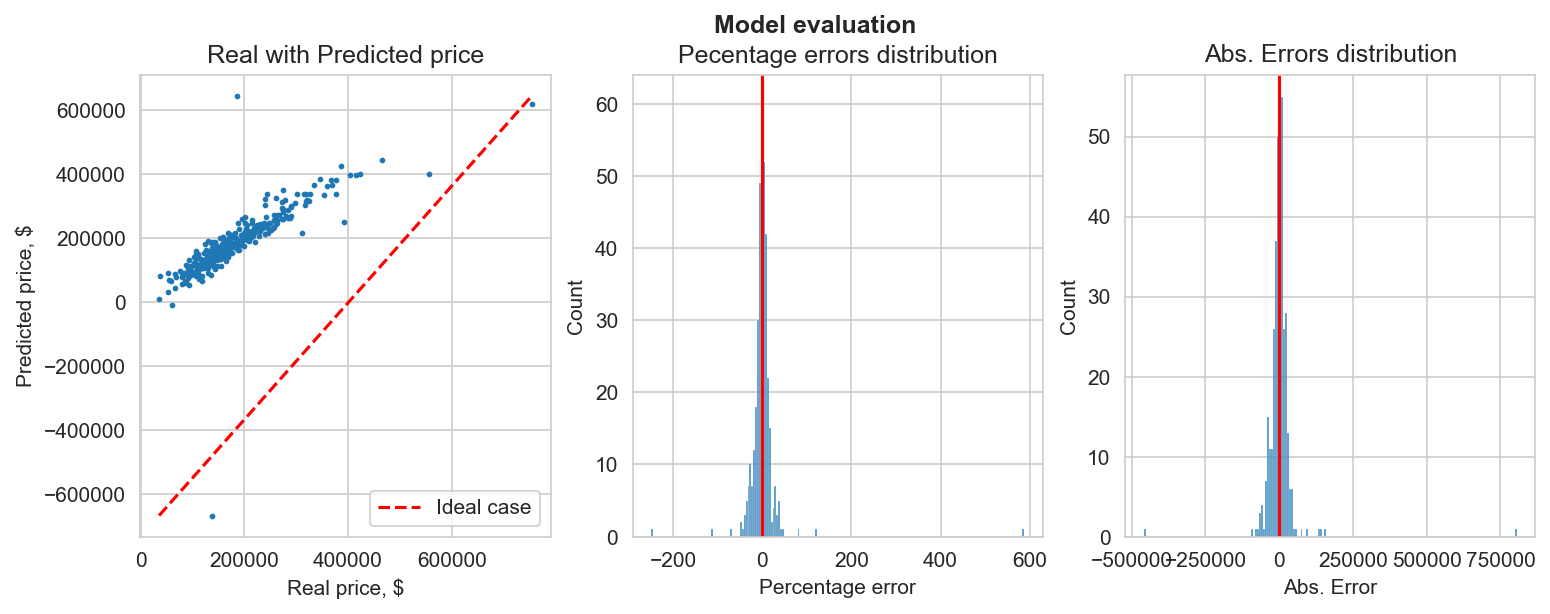

R2 = 0.52
MAPE = 13.901050%
RMSE = 55254.96 $


In [94]:
evaluate_model(y_test, y_pred)

### 5.1.2 Check linear regression coefs

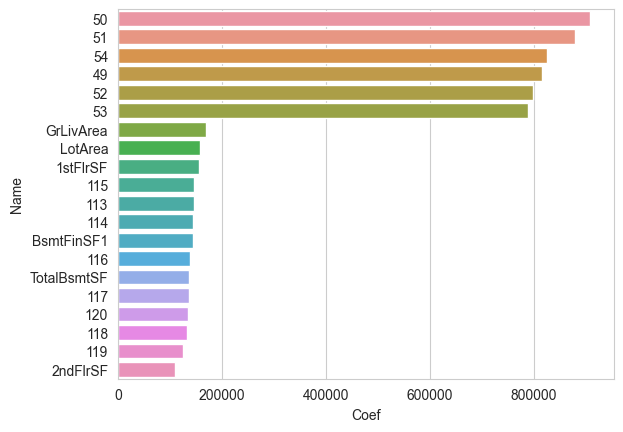

In [95]:
linear_reg_coefs = pd.DataFrame({'Coef' : np.abs(lr.coef_), 'Name' : X_train.columns}).sort_values(by='Coef', ascending=False)
linear_reg_coefs = linear_reg_coefs[:20]
sns.barplot(data=linear_reg_coefs, y='Name', x='Coef')
plt.show()

## 5.2 Decision Tree model

In [96]:
from sklearn.tree import DecisionTreeRegressor

### 5.2.1 Train and measure R2

In [97]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'R2 = {tree.score(X_test, y_test):.2f}')

R2 = 0.80


### 5.2.2 Validate Decision tree

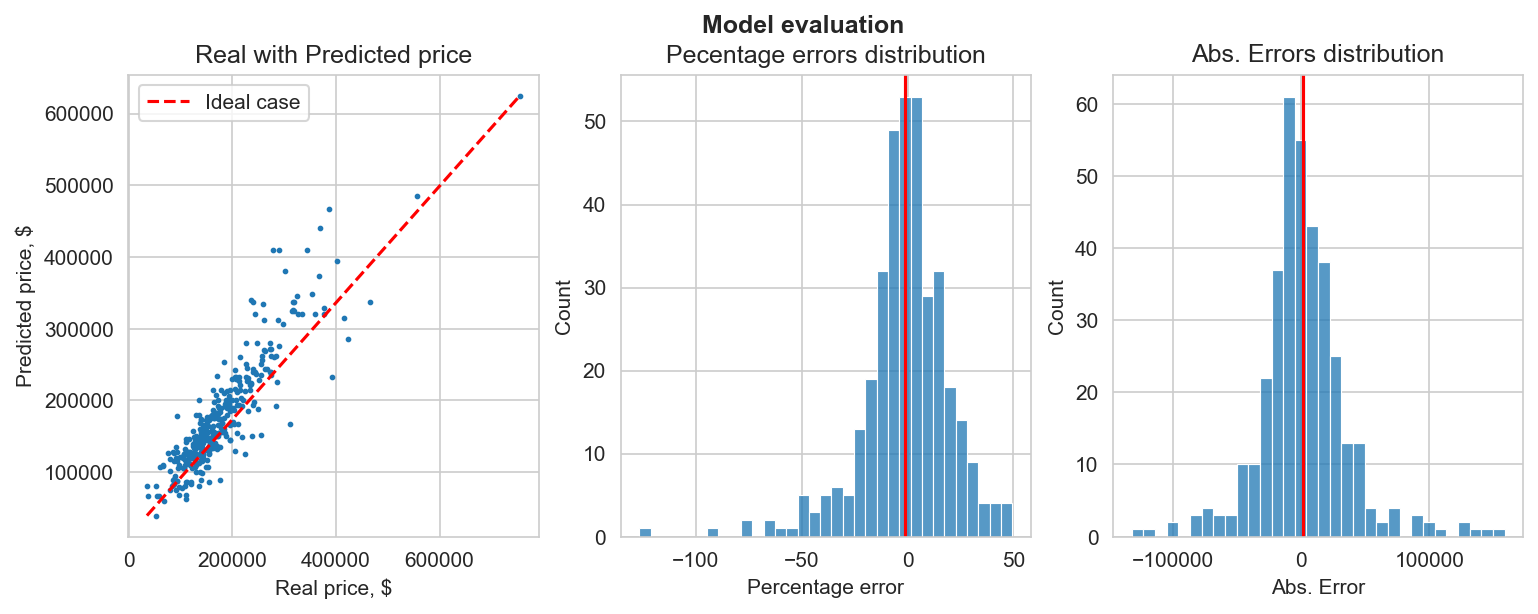

R2 = 0.80
MAPE = 14.597475%
RMSE = 35255.73 $


In [98]:
evaluate_model(y_test, y_pred_tree)

In [99]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 5.2.4 Change tree hypeerparameters

R2 = 0.79


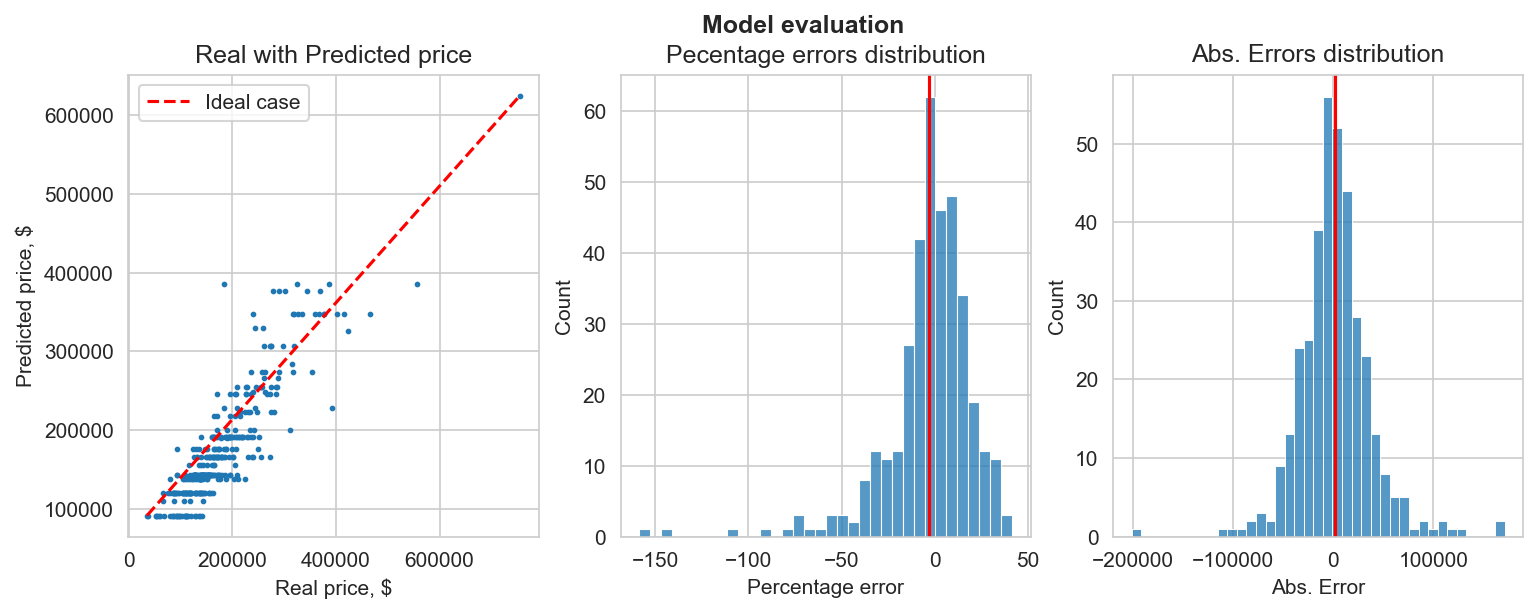

R2 = 0.79
MAPE = 15.657056%
RMSE = 36455.26 $


In [101]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'R2 = {tree.score(X_test, y_test):.2f}')
evaluate_model(y_test, y_pred_tree)

In [102]:
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f'R2 = {tree.score(X_test, y_test):.2f}')
print(f'MAPE = {mape(y_test, y_pred_tree):%}')
print(f'RMSE = {np.sqrt(mse(y_test, y_pred_tree)):.2f} $')

R2 = 0.80
MAPE = 15.635284%
RMSE = 36001.52 $


## 5.3 Random forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

### 5.3.1 Default hyperparameters

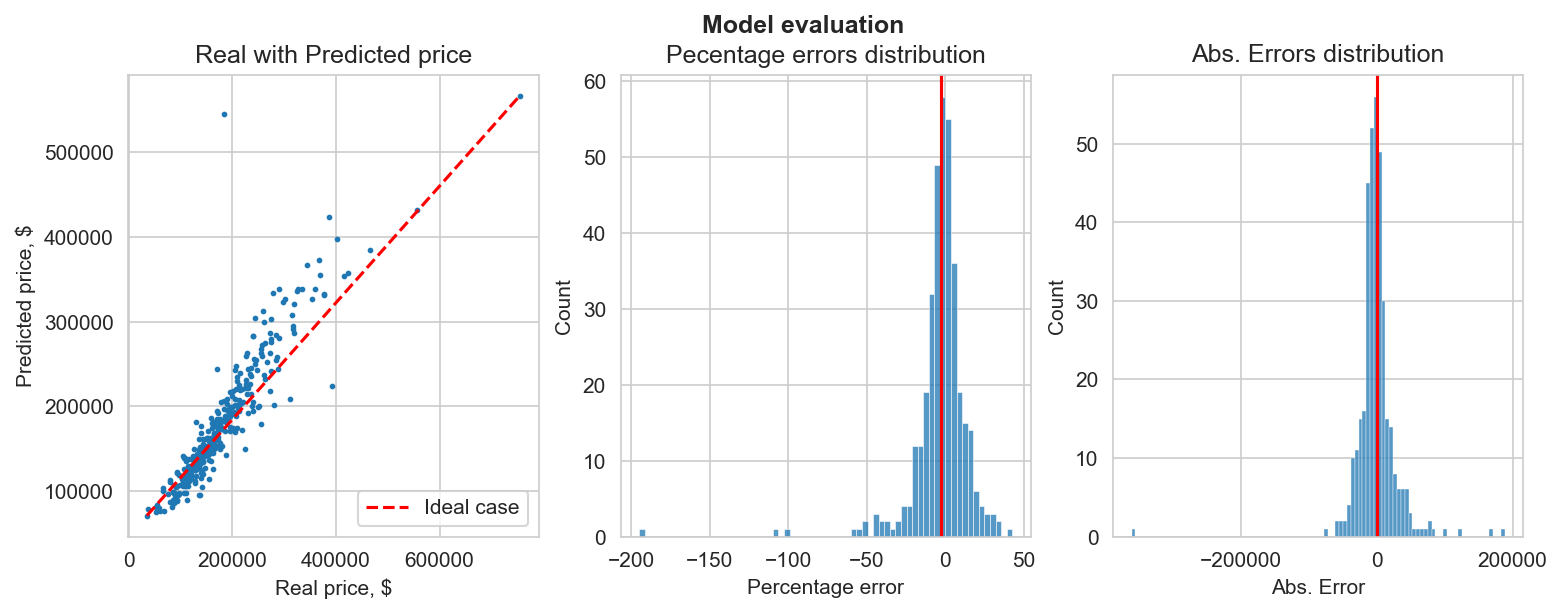

R2 = 0.83
MAPE = 10.420800%
RMSE = 32399.72 $


In [109]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf)

### 5.3.2 Change parameters

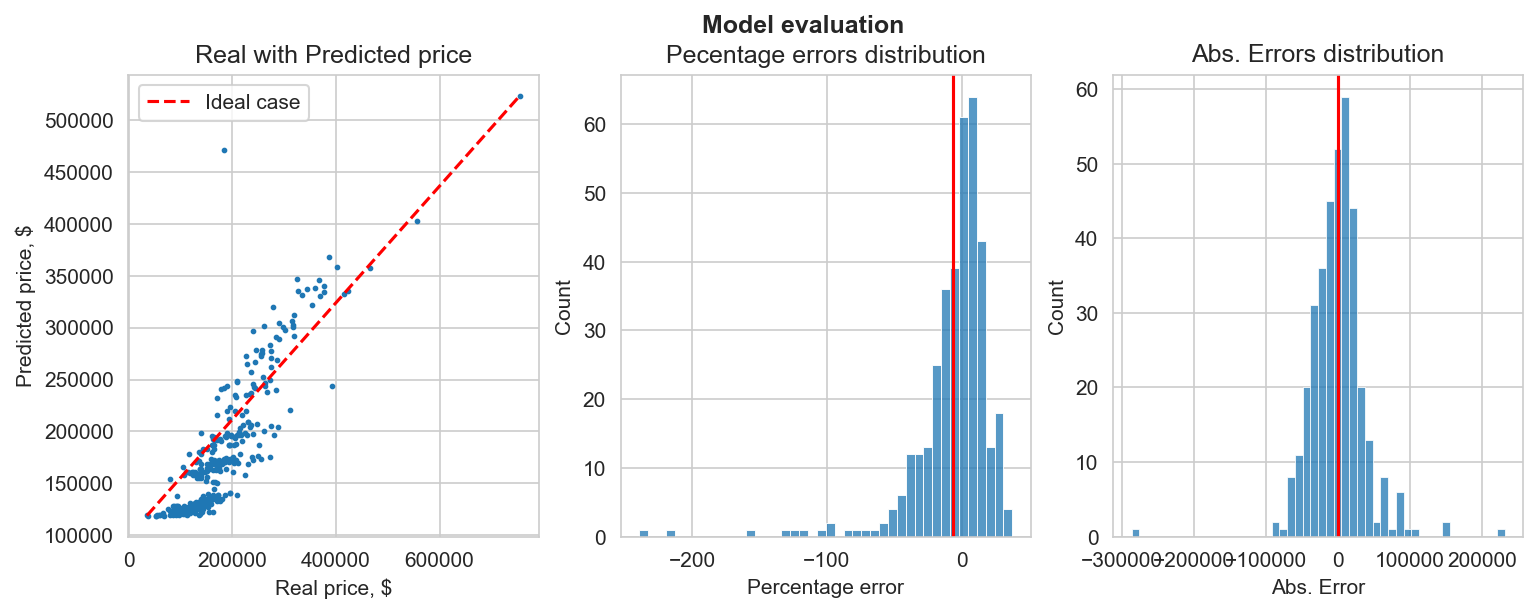

R2 = 0.77
MAPE = 17.943567%
RMSE = 38319.00 $


In [111]:
rf = RandomForestRegressor(n_estimators=200, max_depth=3, min_samples_split=4)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf)

# 6. Grid Search

In [116]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [3, 4, 5, 6],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=param_grid, verbose=10, n_jobs=-1)

In [121]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 2/5; 1/16] START max_depth=3, n_estimators=50...............................[CV 4/5; 1/16] START max_depth=3, n_estimators=50...............................

[CV 1/5; 1/16] START max_depth=3, n_estimators=50...............................
[CV 3/5; 1/16] START max_depth=3, n_estimators=50...............................
[CV 5/5; 1/16] START max_depth=3, n_estimators=50...............................
[CV 1/5; 2/16] START max_depth=3, n_estimators=100..............................
[CV 2/5; 2/16] START max_depth=3, n_estimators=100..............................
[CV 3/5; 2/16] START max_depth=3, n_estimators=100..............................
[CV 4/5; 2/16] START max_depth=3, n_estimators=100..............................
[CV 5/5; 2/16] START max_depth=3, n_estimators=100..............................
[CV 1/5; 3/16] START max_depth=3, n_estimators=150..............................
[CV 2/5; 3/16] START max_depth=3, n_estimators=1

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=10)

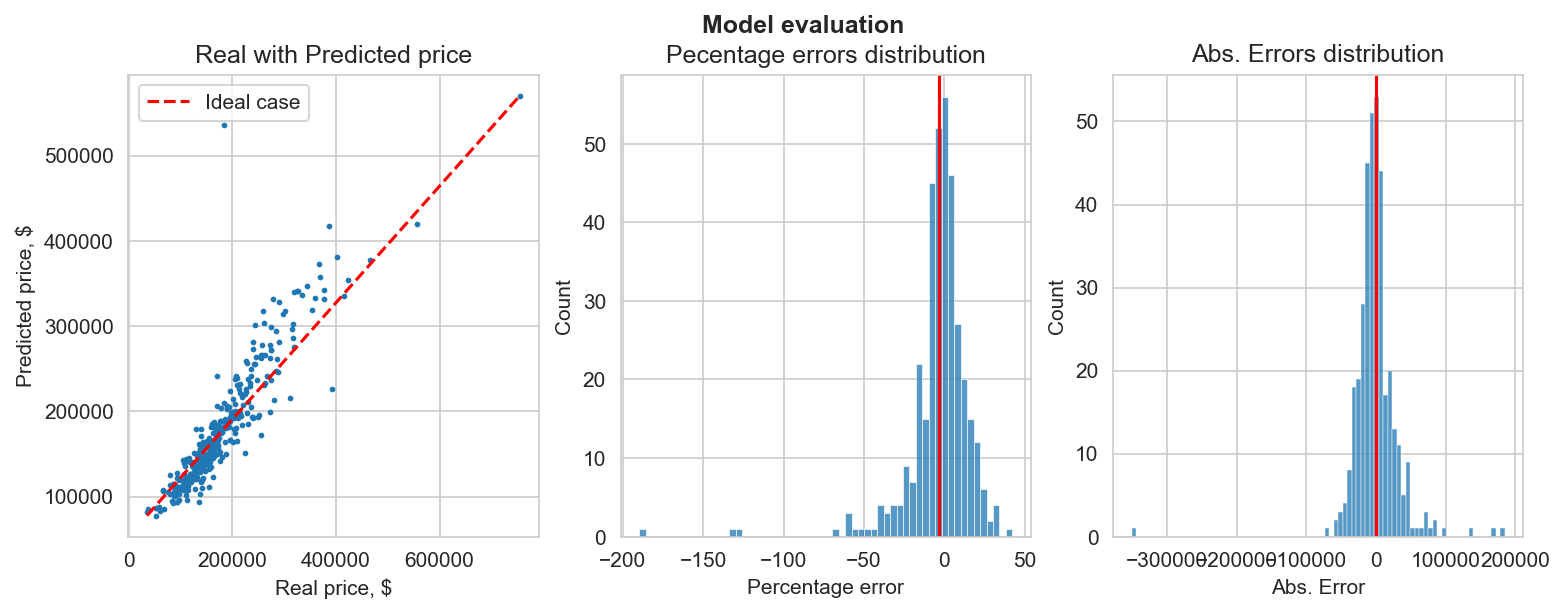

R2 = 0.82
MAPE = 11.970115%
RMSE = 33307.63 $


In [122]:
best_estimator = grid_search.best_estimator_
# best_estimator.fit(X_train, y_train)
y_pred_best_estimator = best_estimator.predict(X_test)

evaluate_model(y_test, y_pred_best_estimator)